In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
pd.options.display.float_format = '{:,.2f}'.format

In [184]:
df = pd.read_csv(r"C:\Users\Hp\Desktop\DATASET\Global_Superstore\Global_Superstore2.csv", encoding= "latin1")

In [185]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,"2,309.65",7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","3,709.39",9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID","5,175.17",9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless","2,892.51",5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed","2,832.96",8,0.00,311.52,903.04,Critical


In [186]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [188]:
df.describe()   

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,"51,290.00","9,994.00","51,290.00","51,290.00","51,290.00","51,290.00","51,290.00"
mean,"25,645.50","55,190.38",246.49,3.48,0.14,28.61,26.38
std,"14,806.29","32,063.69",487.57,2.28,0.21,174.34,57.30
min,1.00,"1,040.00",0.44,1.00,0.00,"-6,599.98",0.00
25%,"12,823.25","23,223.00",30.76,2.00,0.00,0.00,2.61
50%,"25,645.50","56,430.50",85.05,3.00,0.00,9.24,7.79
75%,"38,467.75","90,008.00",251.05,5.00,0.20,36.81,24.45
max,"51,290.00","99,301.00","22,638.48",14.00,0.85,"8,399.98",933.57


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

### Q.1 Calculate total sales and total profit.

In [190]:
df[["Sales", "Profit"]].sum()

Sales    12,642,501.91
Profit    1,467,457.29
dtype: float64

### Q.2 Find top 10 profitable products using groupby

In [191]:
df.groupby(by = "Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10)

Sub-Category
Copiers       258,567.55
Phones        216,717.01
Bookcases     161,924.42
Appliances    141,680.59
Chairs        140,396.27
Accessories   129,626.31
Storage       108,461.49
Binders        72,449.85
Paper          59,207.68
Machines       58,867.87
Name: Profit, dtype: float64

### Q.3 Identify products causing the most losses.

In [192]:
df.groupby(by = "Sub-Category")["Profit"].sum().sort_values(ascending=True).head(3)

Sub-Category
Tables      -64,083.39
Fasteners    11,525.42
Labels       15,010.51
Name: Profit, dtype: float64

### Q.4 Plot category-wise sales and profit.

In [193]:
df.groupby(by = "Category")[["Sales","Profit"]].sum()


,Sales,Profit
Category,,
Furniture,"4,110,874.19","285,204.72"
Office Supplies,"3,787,070.23","518,473.83"
Technology,"4,744,557.50","663,778.73"


### Q.5 Analyse discount impact on sales. 

Text(0.5, 1.0, 'Discount Vs Sales')

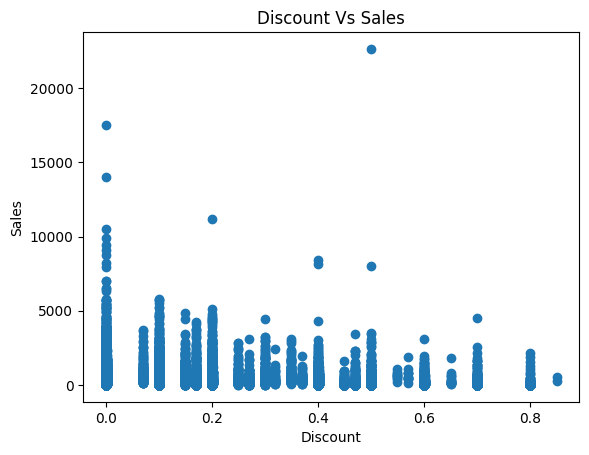

In [194]:
plt.scatter(df["Discount"], df["Sales"])
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.title("Discount Vs Sales")


### Q.6 Find top customers by sales.

In [235]:
df.groupby(by= "Customer Name")["Sales"].agg(["sum", "count"]).head(3)

,sum,count
Customer Name,,
Aaron Bergman,"24,644.63",89
Aaron Hawkins,"20,759.51",56
Aaron Smayling,"14,212.63",60


### Q.7 Count orders per customer.

In [196]:
df['Customer Name'].value_counts(ascending=False).head(10)

Customer Name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
Harry Greene       101
Eric Murdock       100
Art Ferguson        98
Brosina Hoffman     97
Bart Watters        96
Name: count, dtype: int64

### Q.8 Segment-wise performance 

Text(0.5, 1.0, 'Segment Wise Analysis')

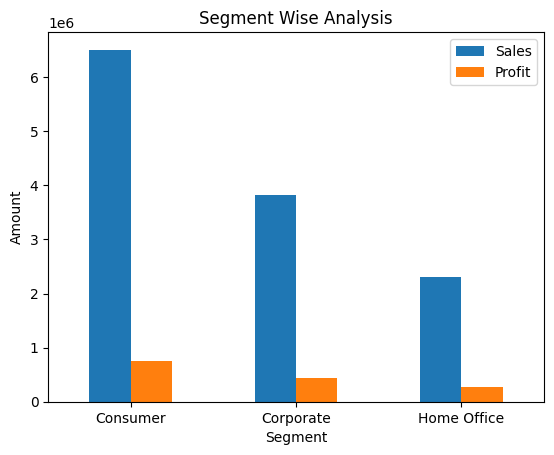

In [197]:
data = df.groupby(by = "Segment")[["Sales", "Profit"]].sum()

data.plot(kind= "bar")
plt.ylabel("Amount")
plt.xticks(rotation = 0)
plt.title("Segment Wise Analysis")


### Q.9 Plot monthly sales trend.

In [198]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_7912\3072535395.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


<Axes: xlabel='YearMonth'>

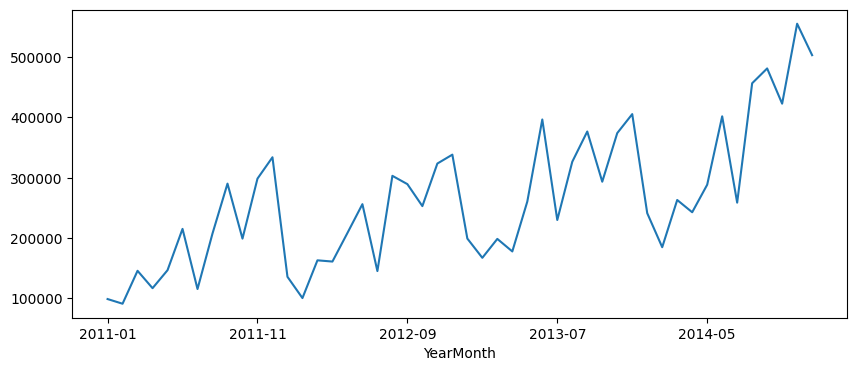

In [199]:
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)
df.groupby('YearMonth')['Sales'].sum().plot(figsize=(10,4))

### Q.10 Calculate shipping time per order.

In [200]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])
df["Shipping Time"] = df["Ship Date"] - df["Order Date"]
df["Shipping Time"].head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_7912\4155649816.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Ship Date"] = pd.to_datetime(df["Ship Date"])


0   0 days
1   2 days
2   1 days
3   2 days
4   1 days
5   3 days
6   2 days
7   4 days
8   7 days
9   3 days
Name: Shipping Time, dtype: timedelta64[ns]

### Q.11 Find most sold sub-category.

In [201]:
df["Sub-Category"].value_counts(ascending= False).head(10)

Sub-Category
Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Name: count, dtype: int64

### Q.12 Compare sales vs quantity.

In [202]:
df[["Sales", "Quantity"]].corr()

,Sales,Quantity
Sales,1.00,0.31
Quantity,0.31,1.00


### Q.13 Plot profit distribution across products.

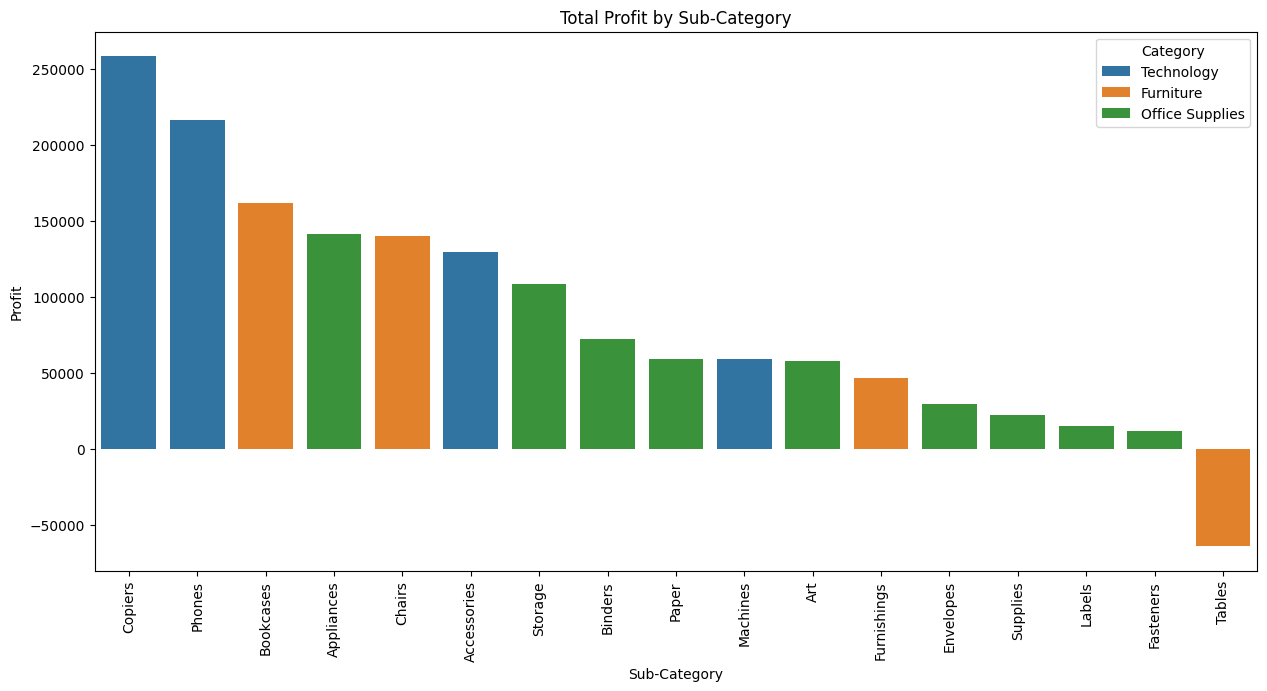

In [203]:
profit_by_product = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()


profit_by_product = profit_by_product.sort_values('Profit', ascending=False)

plt.figure(figsize=(15, 7))

sns.barplot(data=profit_by_product, x='Sub-Category', y='Profit', hue='Category')

plt.xticks(rotation=90) # Rotate labels so they don't overlap
plt.title("Total Profit by Sub-Category")
plt.show()

### Q.14 Country-wise sales and profit.

In [204]:
df.groupby("State")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).head()

,Sales,Profit
State,,
England,"485,170.97","99,907.73"
California,"457,687.63","76,381.39"
Ile-de-France,"317,822.54","44,055.92"
New York,"310,876.27","74,038.55"
New South Wales,"270,487.10","43,695.98"


### Q.15 Region-wise performance heatmap.

<Axes: xlabel='Category', ylabel='Region'>

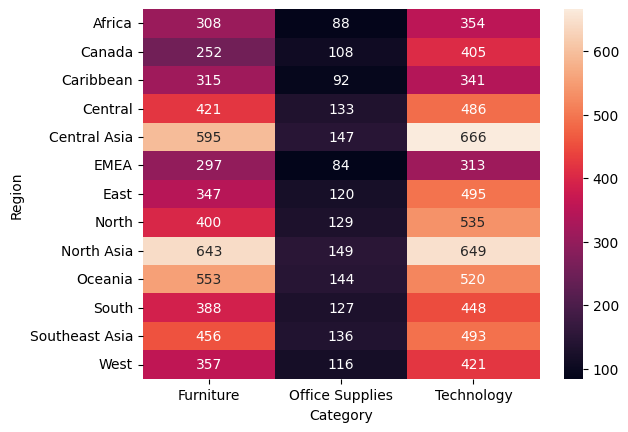

In [205]:
pivot = df.pivot_table(values= "Sales", index= "Region", columns= "Category")
sns.heatmap(pivot,annot=True, fmt='.0f')

### Q.16 Find states with highest losses.

In [206]:
df.groupby("State")["Profit"].sum().sort_values(ascending=True).head(5)

State
Istanbul   -29,033.70
Lagos      -25,922.51
Texas      -25,729.36
Ohio       -16,971.38
Izmir      -15,729.80
Name: Profit, dtype: float64

### Q.17 Compare shipping cost by ship mode.

In [207]:
df.groupby("Ship Mode")["Shipping Cost"].mean()

Ship Mode
First Class      41.05
Same Day         42.94
Second Class     30.47
Standard Class   19.97
Name: Shipping Cost, dtype: float64

### Q.18 Analyze delivery time by priority.

In [208]:
df.groupby('Order Priority')['Shipping Time'].mean()

Order Priority
Critical   1 days 19:20:56.154628687
High       3 days 02:03:33.199148442
Low        6 days 11:38:01.188118811
Medium     4 days 12:23:48.111303638
Name: Shipping Time, dtype: timedelta64[ns]

### Q.19 RFM (Recency-Frequency-Monetary) analysis.

In [210]:
import datetime as dt

snapshot_date = df['Order Date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer Name').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
})
rfm.columns = ['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer Name,,,
Aaron Bergman,17,89,"24,644.63"
Aaron Hawkins,13,56,"20,759.51"
Aaron Smayling,24,60,"14,212.63"
Adam Bellavance,36,68,"20,186.78"
Adam Hart,3,84,"21,718.20"


### Q.20 Identify High-Discount, High-Loss Products

In [228]:
loss_discount_products = (
    df.groupby("Product Name")
      .agg(avg_discount=("Discount", "mean"),
           total_profit=("Profit", "sum"),
           total_sales=("Sales", "sum"))
      .sort_values("total_profit")
)

loss_discount_products.head(10)


,avg_discount,total_profit,total_sales
Product Name,,,
Cubify CubeX 3D Printer Double Head Print,0.53,"-8,879.97","11,099.96"
Lexmark MX611dhe Monochrome Laser Printer,0.40,"-4,589.97","16,829.90"
"Motorola Smart Phone, Cordless",0.12,"-4,447.04","38,931.04"
Cubify CubeX 3D Printer Triple Head Print,0.50,"-3,839.99","7,999.98"
"Bevis Round Table, Adjustable Height",0.46,"-3,649.89","5,654.80"
"Bevis Computer Table, Fully Assembled",0.35,"-3,509.56","11,177.90"
"Rogers Lockers, Blue",0.14,"-2,893.49","28,214.59"
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,0.28,"-2,876.12","9,917.64"
"Bevis Wood Table, with Bottom Storage",0.32,"-2,782.59","11,134.66"


### Q.21 Products with the Highest ROI (Return on Investment)

In [233]:
roi = (
    df.groupby("Product Name")
      .agg(total_sales=("Sales", "sum"),
           total_profit=("Profit", "sum"))
)

roi["ROI_percent"] = (roi["total_profit"] / roi["total_sales"]) * 100

roi.sort_values("ROI_percent", ascending=False).head(20)


,total_sales,total_profit,ROI_percent
Product Name,,,
Avery 475,266.40,133.20,50.00
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier,"3,991.98","1,995.99",50.00
Southworth Structures Collection,72.80,36.40,50.00
Xerox 1890,244.70,122.35,50.00
"Adams Telephone Message Book w/Frequently-Called Numbers Space, 400 Messages per Book",223.44,111.72,50.00
Tops Green Bar Computer Printout Paper,342.58,171.29,50.00
Xerox 1918,155.04,75.97,49.00
Personal Creations Ink Jet Cards and Labels,321.44,157.51,49.00
Avery 5,5.76,2.82,49.00
